# 3.1 Pandas Deep Dive

In [73]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Session 1

In [74]:
filepath = "/Users/mehdisalemi/Desktop/Data Science Intensive/DataSets/Stocks/TWTR.csv"
df_TWTR = pd.read_csv(filepath, index_col="Date").dropna()
df_TWTR.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-07-15,17.980000,18.180000,17.809999,18.080000,17173700,18.080000
2016-07-14,18.020000,18.280001,17.910000,17.959999,19527300,17.959999
2016-07-13,18.209999,18.320000,17.500000,17.740000,17898800,17.740000
2016-07-12,17.980000,18.379999,17.920000,18.100000,23758800,18.100000
2016-07-11,17.590000,17.879999,17.520000,17.709999,24010200,17.709999


### Stocks listing in the DataFrame

In [75]:
df_TWTR.Close.count()

676

### Earliest and Latest Stocks in the DataFrame

In [76]:
df_TWTR.tail(1)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2013-11-07,45.099998,50.09,44.0,44.900002,117701600,44.900002


In [77]:
df_TWTR.head(1)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-07-15,17.98,18.18,17.809999,18.08,17173700,18.08


### How many Stocks have Close between 15-20

In [78]:
df_TWTR[(df_TWTR.Close > 15) & (df_TWTR.Close < 20)].Close.count()

100

# Session 2

### Most 5 Common Stock Close Values?

In [79]:
df_TWTR.Close.value_counts().head(5)

29.059999    4
14.400000    3
50.700001    3
30.910000    2
17.370001    2
Name: Close, dtype: int64

### Which 3 year saw the highest trading volume?

In [80]:

df_TWTR.sort_values("Volume",ascending=False).head(3)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-05-06,35.610001,36.099998,31.719999,31.850000,134710000,31.850000
2015-04-29,40.209999,41.090000,38.070000,38.490002,120488600,38.490002
2013-11-07,45.099998,50.090000,44.000000,44.900002,117701600,44.900002


### Plot the Close Price

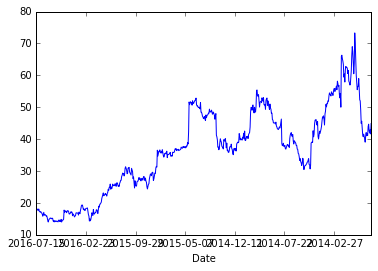

In [81]:
df_TWTR.Close.plot()

# Session 3

### Set Index Differently

In [82]:
df_TWTR2 = pd.read_csv(filepath).dropna()
df_TWTR2.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-15,17.980000,18.180000,17.809999,18.080000,17173700,18.080000
1,2016-07-14,18.020000,18.280001,17.910000,17.959999,19527300,17.959999
2,2016-07-13,18.209999,18.320000,17.500000,17.740000,17898800,17.740000
3,2016-07-12,17.980000,18.379999,17.920000,18.100000,23758800,18.100000
4,2016-07-11,17.590000,17.879999,17.520000,17.709999,24010200,17.709999


In [83]:
df_TWTR_singleIndex = df_TWTR2.set_index(["Date"])
df_TWTR_singleIndex.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-07-15,17.980000,18.180000,17.809999,18.080000,17173700,18.080000
2016-07-14,18.020000,18.280001,17.910000,17.959999,19527300,17.959999
2016-07-13,18.209999,18.320000,17.500000,17.740000,17898800,17.740000
2016-07-12,17.980000,18.379999,17.920000,18.100000,23758800,18.100000
2016-07-11,17.590000,17.879999,17.520000,17.709999,24010200,17.709999


### Set Multiple Index

In [84]:
df_TWTR_multiIndex = df_TWTR2.set_index(["Date","Open"])
df_TWTR_multiIndex.head()

,,High,Low,Close,Volume,Adj Close
Date,Open,,,,,
2016-07-15,17.980000,18.180000,17.809999,18.080000,17173700,18.080000
2016-07-14,18.020000,18.280001,17.910000,17.959999,19527300,17.959999
2016-07-13,18.209999,18.320000,17.500000,17.740000,17898800,17.740000
2016-07-12,17.980000,18.379999,17.920000,18.100000,23758800,18.100000
2016-07-11,17.590000,17.879999,17.520000,17.709999,24010200,17.709999


In [85]:
df_TWTR_multiIndex.loc["2016-07-15"]

,High,Low,Close,Volume,Adj Close
Open,,,,,
17.98,18.18,17.809999,18.08,17173700,18.08


In [86]:
df_TWTR_multiIndex.loc["2016-07-15", 17.98]

High         1.818000e+01
Low          1.781000e+01
Close        1.808000e+01
Volume       1.717370e+07
Adj Close    1.808000e+01
Name: (2016-07-15, 17.98), dtype: float64

#### These Index's only really save time when the indexs are sorted.

In [87]:
timeSavingDF = df_TWTR2.set_index(['Close'])
timeSavingDF.loc[18.100000] ##SLOW
timeSavingDF.sort_index()
timeSavingDF.loc[18.100000] ##VERY FAST

Date         2016-07-12
Open              17.98
High              18.38
Low               17.92
Volume         23758800
Adj Close          18.1
Name: 18.1, dtype: object

In [88]:
timeSavingDF.reset_index().head()

,Close,Date,Open,High,Low,Volume,Adj Close
0,18.080000,2016-07-15,17.980000,18.180000,17.809999,17173700,18.080000
1,17.959999,2016-07-14,18.020000,18.280001,17.910000,19527300,17.959999
2,17.740000,2016-07-13,18.209999,18.320000,17.500000,17898800,17.740000
3,18.100000,2016-07-12,17.980000,18.379999,17.920000,23758800,18.100000
4,17.709999,2016-07-11,17.590000,17.879999,17.520000,24010200,17.709999


### Groupby Functon -> Not best with this data set but examples below.

#### This will return a grouped object that must perform something on (.size())

In [92]:
df_TWTR.groupby(['Close']).size().head()

Close
14.01    1
14.02    1
14.03    1
14.08    1
14.10    1
dtype: int64

#### first automatically sorted this index, in this case it can only count 1 per! Group by basically get all the ROWS from the parameter, above is close... and smushes them together, and displayes the count. We use .size() for groupby by, but mean, max, min are also commonly used. 

# Session 4

#### Stack and Unstack are similar to set_index, and reset_index but for columns, you are setting up another column in the same way.

### Build better dataframe with multile stocks for these examples. 

In [127]:
df_IPHI = pd.read_csv("/Users/mehdisalemi/Desktop/Data Science Intensive/DataSets/Stocks/IPHI.csv", index_col="Date", usecols=["Date", "Adj Close"]).dropna()
df_IPHI.rename(columns={'Adj Close': 'IPHI'}, inplace=True)
df_INTC = pd.read_csv("/Users/mehdisalemi/Desktop/Data Science Intensive/DataSets/Stocks/INTC.csv", index_col="Date", usecols=["Date", "Adj Close"]).dropna()
df_INTC.rename(columns={'Adj Close': 'INTC'}, inplace=True)
df_stocks = df_IPHI.join(df_INTC)
df_stocks.head()

,IPHI,INTC
Date,,
2016-07-15,33.549999,35.070000
2016-07-14,33.480000,35.200001
2016-07-13,33.369999,35.009998
2016-07-12,33.680000,34.939999
2016-07-11,33.220001,34.380001


In [134]:
df_stocks.unstack(0).unstack(1)

Date,2016-07-15,2016-07-14,2016-07-13,2016-07-12,2016-07-11,2016-07-08,2016-07-07,2016-07-06,2016-07-05,2016-07-01,...,2010-11-26,2010-11-24,2010-11-23,2010-11-22,2010-11-19,2010-11-18,2010-11-17,2010-11-16,2010-11-15,2010-11-12
IPHI,33.549999,33.480000,33.369999,33.680000,33.220001,32.73,31.190001,30.889999,30.76,31.540001,...,15.480000,15.650000,15.120000,15.130000,15.180000,16.200001,16.000000,15.900000,15.840000,15.630000
INTC,35.070000,35.200001,35.009998,34.939999,34.380001,34.00,33.200001,32.970001,32.68,32.750000,...,17.712547,17.754047,17.505043,17.637845,17.546543,17.446942,17.496743,17.488442,17.679346,17.870251


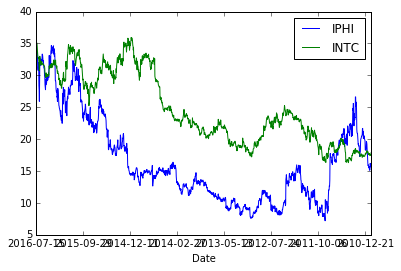

In [136]:
df_stocks.plot()